In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import timeit
import Cluster_Ensembles as CE
from functools import reduce
start_time=timeit.default_timer()
import anndata as ad
print(ad.__version__)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.6.1
scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/AO/'
AO =ad.read_csv(path + 'AO_leukemia_simulations_annot_100cells2.csv', delimiter= None, first_column_names=None, dtype='float32')

In [3]:
AO.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 10000 × 81 >

In [4]:
mito_genes = [name for name in AO.var_names if name.startswith('MT-')]
AO.obs['percent_mito']=np.sum( AO[:, mito_genes].X, axis=1)/ np.sum(AO.X, axis=1)
AO.obs['n_counts']= AO.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


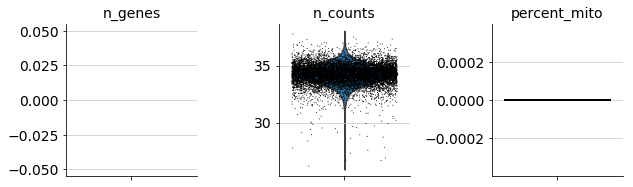

In [5]:
sc.pl.violin(AO, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

In [6]:
sc.pp.normalize_per_cell(AO, counts_per_cell_after=20000)

In [7]:
AO.raw = sc.pp.log1p(AO, copy=True)

In [8]:
sc.tl.pca(AO)

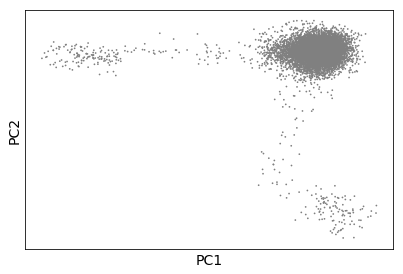

In [9]:
AO.obsm['X_pca'] *=-1
sc.pl.pca_scatter(AO)

In [10]:
sc.tl.tsne(AO, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:32.97) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [11]:
import MulticoreTSNE

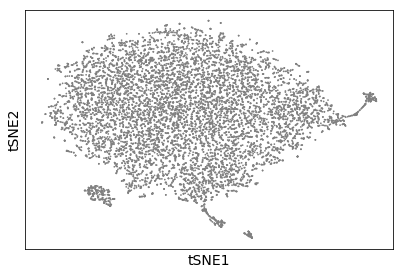

In [12]:
sc.pl.tsne(AO)

In [13]:
sc.pp.neighbors(AO, n_neighbors=7)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:08.59) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [14]:
sc.tl.louvain(AO)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.75) --> found 29 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [15]:
sc.tl.umap(AO)

computing UMAP
    finished (0:00:20.99) --> added
    'X_umap', UMAP coordinates (adata.obsm)


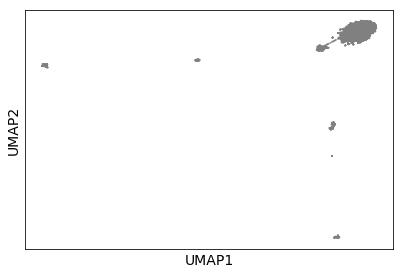

In [16]:
sc.pl.umap(AO, use_raw=False)

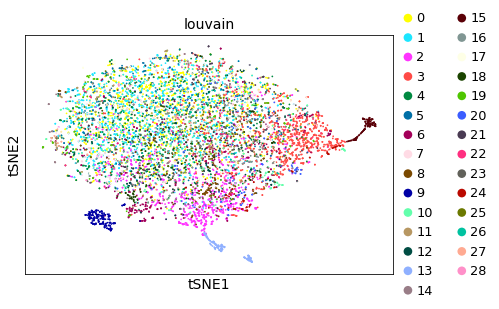

In [17]:
sc.pl.tsne(AO, color='louvain')

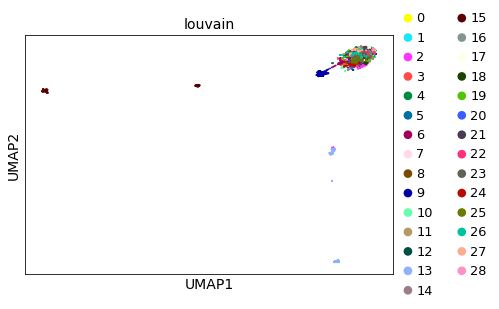

In [18]:
sc.pl.umap(AO, color='louvain')

In [19]:
sc.tl.louvain(AO, resolution=0.25)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.72) --> found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


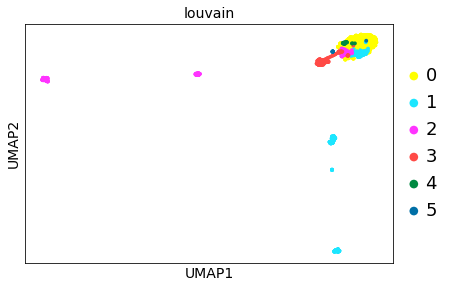

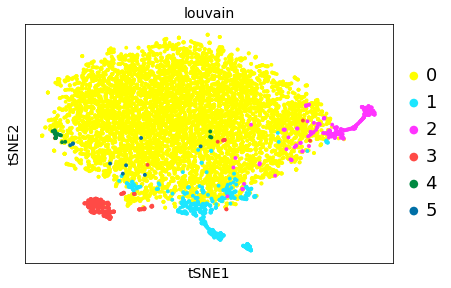

In [20]:
sc.pl.umap(AO, color='louvain', size = 60, legend_fontsize = 18)
sc.pl.tsne(AO, color='louvain', size = 60, legend_fontsize = 18)

ranking genes
    finished (0:00:00.03) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids


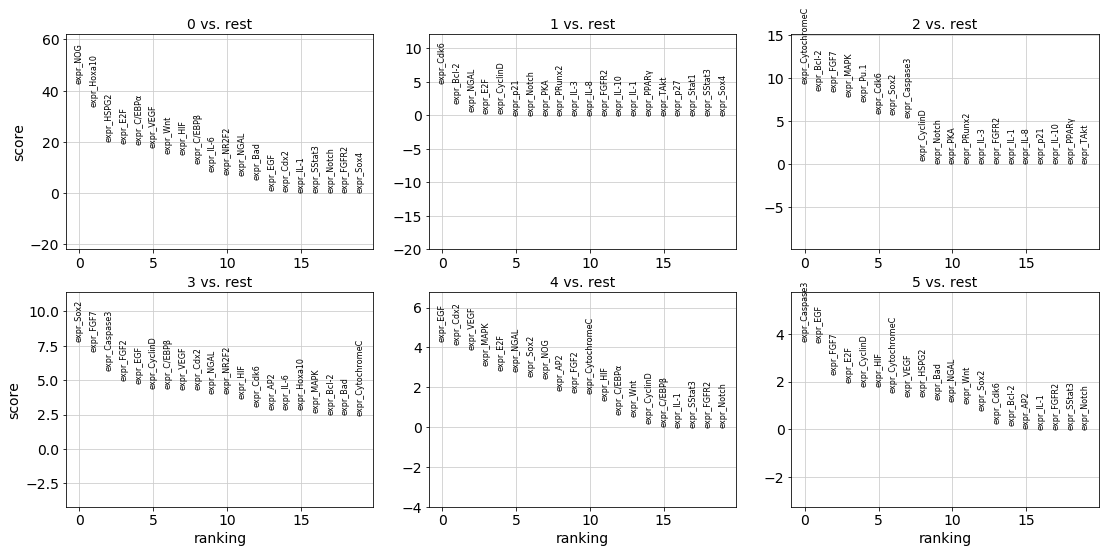

In [21]:
sc.tl.rank_genes_groups(AO, 'louvain')
sc.pl.rank_genes_groups(AO, n_genes=20,)

In [22]:
AO_louvain=pd.DataFrame(AO.uns['rank_genes_groups']['names']).head(100)
AO_louvain

,0,1,2,3,4,5
0,expr_NOG,expr_Cdk6,expr_CytochromeC,expr_Sox2,expr_EGF,expr_Caspase3
1,expr_Hoxa10,expr_Bcl-2,expr_Bcl-2,expr_FGF7,expr_Cdx2,expr_EGF
2,expr_HSPG2,expr_NGAL,expr_FGF7,expr_Caspase3,expr_VEGF,expr_FGF7
3,expr_E2F,expr_E2F,expr_MAPK,expr_FGF2,expr_MAPK,expr_E2F
4,expr_C/EBPα,expr_CyclinD,expr_Pu.1,expr_EGF,expr_E2F,expr_CyclinD
5,expr_VEGF,expr_p21,expr_Cdk6,expr_CyclinD,expr_NGAL,expr_HIF
6,expr_Wnt,expr_Notch,expr_Sox2,expr_C/EBPβ,expr_Sox2,expr_CytochromeC
7,expr_HIF,expr_PKA,expr_Caspase3,expr_VEGF,expr_NOG,expr_VEGF
8,expr_C/EBPβ,expr_PRunx2,expr_CyclinD,expr_Cdx2,expr_AP2,expr_HSPG2
9,expr_IL-6,expr_IL-3,expr_Notch,expr_NGAL,expr_FGF2,expr_Bad


In [23]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/AO/'
Sim =ad.read_csv(path + 'srep24307-s3.csv', delimiter= '\t', first_column_names=True)
Sim = Sim.T

In [24]:
Sim.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 18 × 81 >

In [25]:
print(Sim)

AnnData object with n_obs × n_vars = 18 × 81 


In [26]:
Sim.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 18 × 81 >

In [27]:
mito_genes = [name for name in Sim.var_names if name.startswith('MT-')]
Sim.obs['percent_mito']=np.sum( Sim[:, mito_genes].X, axis=1)/ np.sum(Sim.X, axis=1)
Sim.obs['n_counts']= Sim.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


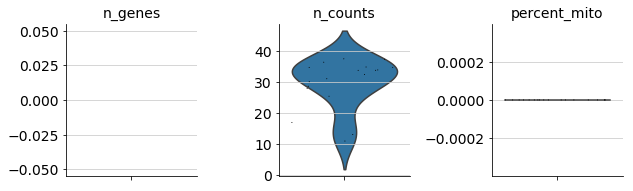

In [28]:
sc.pl.violin(Sim, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

In [29]:
sc.pp.normalize_per_cell(Sim, counts_per_cell_after=20000)

In [30]:
Sim.raw = sc.pp.log1p(Sim, copy=True)

In [31]:
sc.tl.pca(Sim)

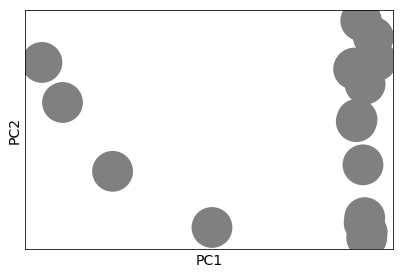

In [32]:
Sim.obsm['X_pca'] *=-1
sc.pl.pca_scatter(Sim)

In [33]:
sc.tl.tsne(Sim, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:00.03) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [34]:
import MulticoreTSNE

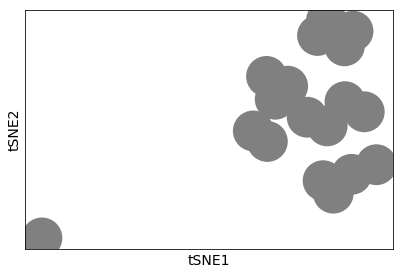

In [35]:
sc.pl.tsne(Sim)

In [36]:
sc.pp.neighbors(Sim, n_neighbors=7)

computing neighbors
    using 'X_pca' with n_pcs = 18
    finished (0:00:05.44) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [37]:
sc.tl.louvain(Sim)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.00) --> found 3 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [38]:
sc.tl.umap(Sim)

computing UMAP
    finished (0:00:00.04) --> added
    'X_umap', UMAP coordinates (adata.obsm)


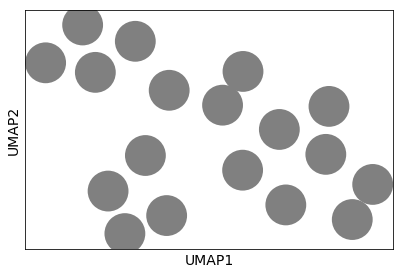

In [39]:
sc.pl.umap(Sim, use_raw=False)

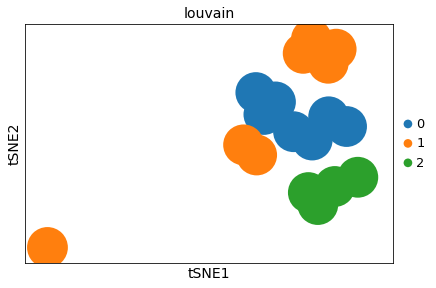

In [40]:
sc.pl.tsne(Sim, color='louvain')

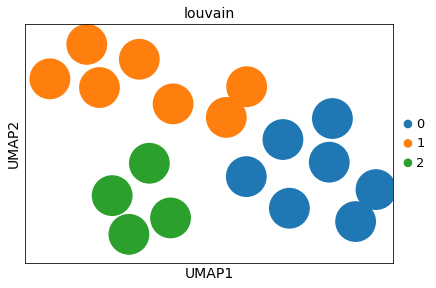

In [41]:
sc.pl.umap(Sim, color='louvain')

In [42]:
sc.tl.louvain(Sim, resolution=1.9)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.00) --> found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


    number of defined colors smaller than number of categories, using palette


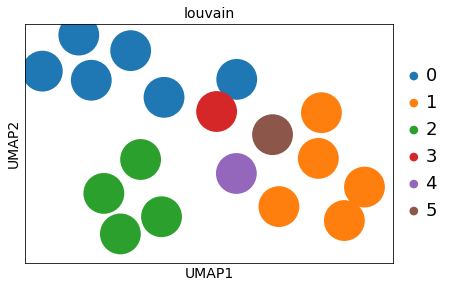

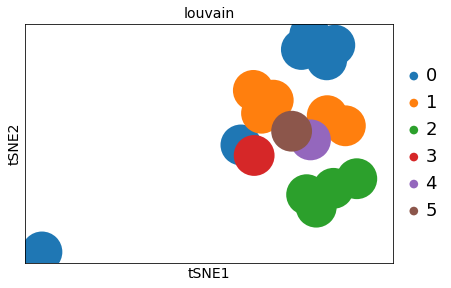

In [43]:
sc.pl.umap(Sim, color='louvain', legend_fontsize = 18)
sc.pl.tsne(Sim, color='louvain', legend_fontsize = 18)

In [44]:
AOCluster1 = AO.obs.loc[AO.obs['louvain'] == '0']

In [45]:
AOCluster1['index1'] = AOCluster1.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
AOCluster1 = AOCluster1['index1'].tolist()

In [47]:
AOCluster1 = AO[AOCluster1, :]

In [48]:
AOCluster2 = AO.obs.loc[AO.obs['louvain'] == '1']

In [49]:
AOCluster2['index2'] = AOCluster2.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
AOCluster2 = AOCluster2['index2'].tolist()

In [51]:
AOCluster2 = AO[AOCluster2, :]

In [52]:
AOCluster3 = AO.obs.loc[AO.obs['louvain'] == '2']

In [53]:
AOCluster3['index3'] = AOCluster3.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
AOCluster3 = AOCluster3['index3'].tolist()

In [55]:
AOCluster3 = AO[AOCluster3, :]

In [56]:
AOCluster4 = AO.obs.loc[AO.obs['louvain'] == '3']

In [57]:
AOCluster4['index4'] = AOCluster4.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
AOCluster4 = AOCluster4['index4'].tolist()

In [59]:
AOCluster4 = AO[AOCluster4, :]

In [60]:
AOCluster5 = AO.obs.loc[AO.obs['louvain'] == '4']

In [61]:
AOCluster5['index5'] = AOCluster5.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
AOCluster5 = AOCluster5['index5'].tolist()

In [63]:
AOCluster5 = AO[AOCluster5, :]

In [64]:
AOCluster6 = AO.obs.loc[AO.obs['louvain'] == '5']

In [65]:
AOCluster6['index6'] = AOCluster6.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
AOCluster6 = AOCluster6['index6'].tolist()

In [67]:
AOCluster6 = AO[AOCluster6, :]

In [68]:
SimCluster1 = Sim.obs.loc[Sim.obs['louvain'] == '0']

In [69]:
SimCluster1['index7'] = SimCluster1.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
SimCluster1 = SimCluster1['index7'].tolist()

In [71]:
SimCluster1 = Sim[SimCluster1, :]

In [72]:
SimCluster2 = Sim.obs.loc[Sim.obs['louvain'] == '1']

In [73]:
SimCluster2['index8'] = SimCluster2.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
SimCluster2 = SimCluster2['index8'].tolist()

In [75]:
SimCluster2 = Sim[SimCluster2, :]

In [76]:
SimCluster3 = Sim.obs.loc[Sim.obs['louvain'] == '2']

In [77]:
SimCluster3['index9'] = SimCluster3.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
SimCluster3 = SimCluster3['index9'].tolist()

In [79]:
SimCluster3 = Sim[SimCluster3, :]

In [80]:
SimCluster4 = Sim.obs.loc[Sim.obs['louvain'] == '3']

In [81]:
SimCluster4['index10'] = SimCluster4.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
SimCluster4 = SimCluster4['index10'].tolist()

In [83]:
SimCluster4 = Sim[SimCluster4, :]

In [84]:
SimCluster5 = Sim.obs.loc[Sim.obs['louvain'] == '4']

In [85]:
SimCluster5['index11'] = SimCluster5.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
SimCluster5 = SimCluster5['index11'].tolist()

In [87]:
SimCluster5 = Sim[SimCluster5, :]

In [88]:
SimCluster6 = Sim.obs.loc[Sim.obs['louvain'] == '5']

In [89]:
SimCluster6['index12'] = SimCluster6.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
SimCluster6 = SimCluster6['index12'].tolist()

In [91]:
SimCluster6 = Sim[SimCluster6, :]

In [92]:
AOCluster1 = AOCluster1.X.mean(axis=1)

In [93]:
AOCluster2 = AOCluster2.X.mean(axis=1)

In [94]:
AOCluster3 = AOCluster3.X.mean(axis=1)


In [95]:
AOCluster4 = AOCluster4.X.mean(axis=1)

In [96]:
AOCluster5 = AOCluster5.X.mean(axis=1)

In [97]:
AOCluster6 = AOCluster6.X.mean(axis=1)

In [98]:
SimCluster1 = SimCluster1.X.mean()

In [99]:
SimCluster2 = SimCluster2.X.mean()

In [100]:
SimCluster3 = SimCluster3.X.mean()

In [101]:
SimCluster4 = SimCluster4.X.mean()

In [102]:
SimCluster5 = SimCluster5.X.mean()

In [103]:
SimCluster6 = SimCluster6.X.mean()

In [104]:
from scipy.spatial import distance

In [105]:
dist11 = distance.euclidean(AOCluster1, SimCluster1)

In [106]:
dist12 =  distance.euclidean(AOCluster1, SimCluster2)

In [107]:
dist13 =  distance.euclidean(AOCluster1, SimCluster3)

In [108]:
dist14 =  distance.euclidean(AOCluster1, SimCluster4)

In [109]:
dist15 = distance.euclidean(AOCluster1, SimCluster5)

In [110]:
dist16 =  distance.euclidean(AOCluster1, SimCluster6)

In [111]:
dist21 = distance.euclidean(AOCluster2, SimCluster1)

In [112]:
dist22 =  distance.euclidean(AOCluster2, SimCluster2)

In [113]:
dist23 =  distance.euclidean(AOCluster2, SimCluster3)

In [114]:
dist24 =  distance.euclidean(AOCluster2, SimCluster4)

In [115]:
dist25 = distance.euclidean(AOCluster2, SimCluster5)

In [116]:
dist26 =  distance.euclidean(AOCluster2, SimCluster6)

In [117]:
dist31 = distance.euclidean(AOCluster3, SimCluster1)

In [118]:
dist32 =  distance.euclidean(AOCluster3, SimCluster2)

In [119]:
dist33 =  distance.euclidean(AOCluster3, SimCluster3)

In [120]:
dist34 =  distance.euclidean(AOCluster3, SimCluster4)

In [121]:
dist35 = distance.euclidean(AOCluster3, SimCluster5)

In [122]:
dist36 =  distance.euclidean(AOCluster3, SimCluster6)
dist36

0.0013150031445547938

In [123]:
dist41 = distance.euclidean(AOCluster4, SimCluster1)

In [124]:
dist42 =  distance.euclidean(AOCluster4, SimCluster2)

In [125]:
dist43 =  distance.euclidean(AOCluster4, SimCluster3)

In [126]:
dist44 =  distance.euclidean(AOCluster4, SimCluster4)

In [127]:
dist45 = distance.euclidean(AOCluster4, SimCluster5)

In [128]:
dist46 =  distance.euclidean(AOCluster4, SimCluster6)

In [129]:
dist51 = distance.euclidean(AOCluster5, SimCluster1)

In [130]:
dist52 =  distance.euclidean(AOCluster5, SimCluster2)

In [131]:
dist53 =  distance.euclidean(AOCluster5, SimCluster3)

In [132]:
dist54 =  distance.euclidean(AOCluster5, SimCluster4)

In [133]:
dist55 = distance.euclidean(AOCluster5, SimCluster5)

In [134]:
dist56 =  distance.euclidean(AOCluster5, SimCluster6)

In [135]:
dist61 = distance.euclidean(AOCluster6, SimCluster1)

In [136]:
dist62 =  distance.euclidean(AOCluster6, SimCluster2)

In [137]:
dist63 =  distance.euclidean(AOCluster6, SimCluster3)

In [138]:
dist64 =  distance.euclidean(AOCluster6, SimCluster4)

In [139]:
dist65 = distance.euclidean(AOCluster6, SimCluster5)

In [140]:
dist66 =  distance.euclidean(AOCluster6, SimCluster6)

In [141]:
[dist11, dist12, dist13, dist14, dist15, dist16]

[0.0019322109874337912,
 0.004378527868539095,
 0.0019322109874337912,
 0.003143125446513295,
 0.005710518918931484,
 0.007084828335791826]

In [142]:
[dist21, dist22, dist23, dist24, dist25, dist26]

[0.00046457938151434064,
 0.0010266568278893828,
 0.00046457938151434064,
 0.0007328985375352204,
 0.0013447660021483898,
 0.0016733959782868624]

In [143]:
[dist31, dist32, dist33, dist34, dist35, dist36]

[0.0003001757140737027,
 0.0008175920811481774,
 0.0003001757140737027,
 0.0005836362252011895,
 0.0010636372026056051,
 0.0013150031445547938]

In [144]:
[dist41, dist42, dist43, dist44, dist45, dist46]

[0.0003258385695517063,
 0.0007795434212312102,
 0.0003258385695517063,
 0.0005627163336612284,
 0.0010112329619005322,
 0.0012495447881519794]

In [145]:
[dist51, dist52, dist53, dist54, dist55, dist56]

[9.770392352947965e-05,
 0.00022837264987174422,
 9.770392352947965e-05,
 0.0001678466796875,
 0.00029311177786439657,
 0.00035979694803245366]

In [146]:
[dist61, dist62, dist63, dist64, dist65, dist66]

[4.037096005049534e-05,
 0.00014793945592828095,
 4.037096005049534e-05,
 0.00010460898920428008,
 0.00019240600522607565,
 0.00023737104493193328]